In [1]:
import pandas as pd
import numpy as np
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
trips = pd.read_csv("Customer_Integrated_04_10_2019.csv");

In [3]:
trips.head()

,Amtrak_Cust_ID,LIF_Departure_Date,Route_Code,Rail_Amount,Accommodation_Amount,Origin_Station,Destination_Station,Billing_State,Billing_Zip,Home_Station,Minutes_to_Home_Station,Miles_to_Home_Station,Population_of_Billing_Zip
0,329984,2018-11-30,5,103.0,0.0,BWI,PHL,MD,21045,BWI,20.120357,14.53728,38361
1,337765,2018-01-23,5,51.0,0.0,BWI,PHL,MD,21045,BWI,20.120357,14.53728,38361
2,337765,2018-05-23,5,51.0,0.0,BWI,PHL,MD,21045,BWI,20.120357,14.53728,38361
3,337765,2018-06-21,5,83.0,0.0,BWI,PHL,MD,21045,BWI,20.120357,14.53728,38361
4,337765,2018-08-16,5,51.0,0.0,BWI,PHL,MD,21045,BWI,20.120357,14.53728,38361


# Plot for proportion of origin station

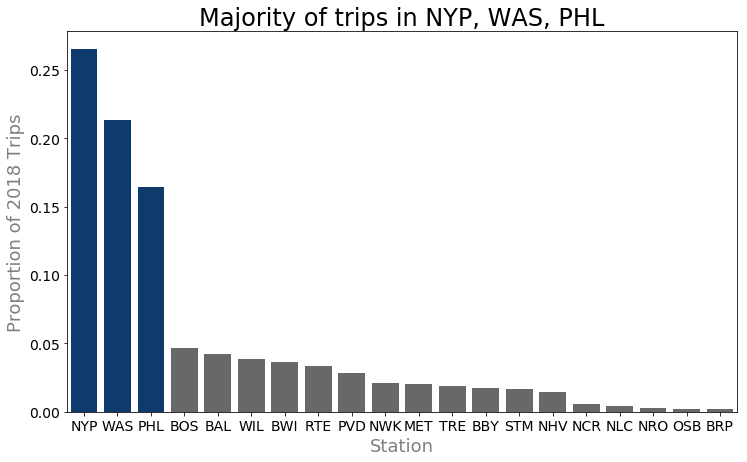

In [4]:
a =  pd.DataFrame({'count': trips.groupby(['Origin_Station']).size()}).reset_index()
a_len = len(trips.groupby(['Origin_Station']).size())
a['proportion'] = a['count']/np.sum(a['count'])
a.sort_values(by='count', ascending=False)[:10]
trips_by_station = a.sort_values(by='count', ascending=False).reset_index()
clrs = ['#65686b' if (x < 100000) else '#003a7b' for x in trips_by_station['count']]

g = sns.barplot(x=trips_by_station['Origin_Station'][:20], y=trips_by_station['proportion'][:20], palette=clrs[:20])
g.figure.set_size_inches(12,7)
g.axes.set_title('Majority of trips in NYP, WAS, PHL', fontsize=24)
# Set the xlabel of the graph from here
g.set_xlabel("Station",size = 18,alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Proportion of 2018 Trips",size = 18,alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=14,labelcolor="black");

# Plot for Home Station

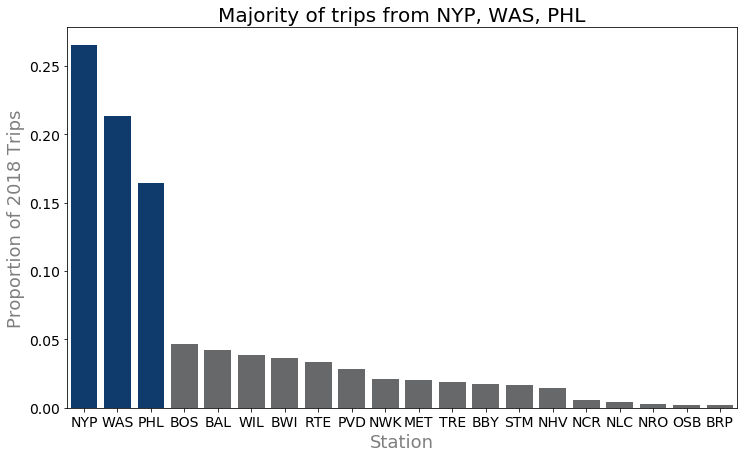

In [5]:
a =  pd.DataFrame({'count': trips.groupby(['Home_Station']).size()}).reset_index()
a_len = len(trips.groupby(['Home_Station']).size())
a['proportion'] = a['count']/np.sum(a['count'])
a.sort_values(by='count', ascending=False)[:10]
trips_by_station = a.sort_values(by='count', ascending=False).reset_index()

clrs = ['#65686b' if (x < 100000) else '#003a7b' for x in trips_by_station['count']]

g = sns.barplot(x=trips_by_station['Home_Station'][:20], y=trips_by_station['proportion'][:20], palette=clrs[:20])
g.figure.set_size_inches(12,7)
g.axes.set_title('Majority of trips from NYP, WAS, PHL', fontsize=20)
# Set the xlabel of the graph from here
g.set_xlabel("Station",size = 18,alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Proportion of 2018 Trips",size = 18,alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=14,labelcolor="black");

# Time Series

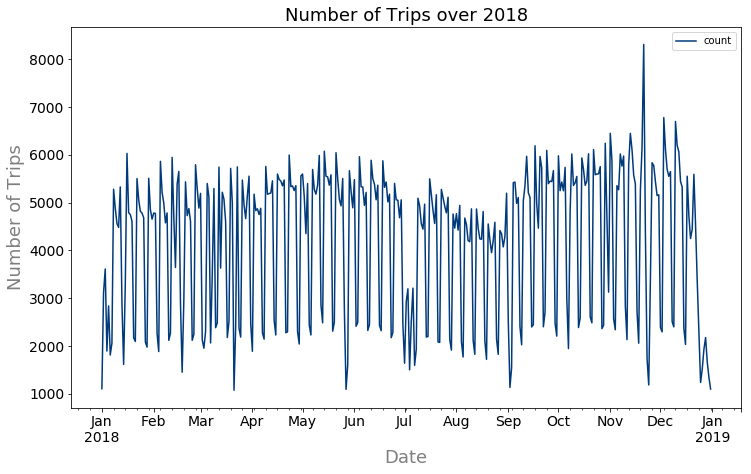

In [6]:
a =  pd.DataFrame({'count': trips.groupby(['LIF_Departure_Date']).size()}).reset_index()
a['LIF_Departure_Date'] = pd.to_datetime(a['LIF_Departure_Date'])

# Set the index to be the date. This is important
a = a.set_index('LIF_Departure_Date')

ax = a.plot(color='#003a7b')
# ax = flights.plot(color='blue',
#                   figsize=(8, 4), fontsize=8,
#                   linewidth=3, linestyle='--')
ax.figure.set_size_inches(12,7)
ax.set_xlabel('Date', size=18, alpha=0.5)
ax.set_ylabel('Number of Trips', size=18, alpha=0.5)
ax.set_title('Number of Trips over 2018', size=18)
ax.tick_params(labelsize=14,labelcolor="black");
plt.show();

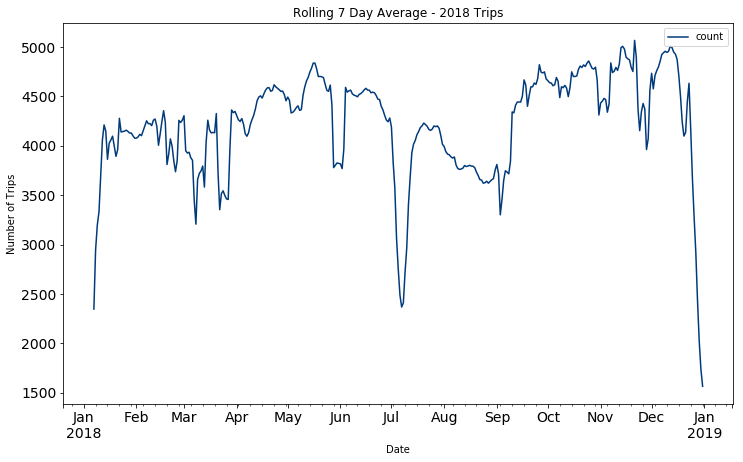

In [7]:
b = a.rolling(window=7).mean()
ax = b.plot(color='#003a7b')
# ax = flights.plot(color='blue',
#                   figsize=(8, 4), fontsize=8,
#                   linewidth=3, linestyle='--')
ax.figure.set_size_inches(12,7)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Trips')
ax.set_title('Rolling 7 Day Average - 2018 Trips')
ax.tick_params(labelsize=14,labelcolor="black");
plt.show();

# Multipe time series

In [8]:
a =  pd.DataFrame({'count': trips.groupby(['LIF_Departure_Date', 'Origin_Station']).size()}).reset_index()
a['LIF_Departure_Date'] = pd.to_datetime(a['LIF_Departure_Date'])

# Set the index to be the date. This is important
a = a.set_index('LIF_Departure_Date')

In [9]:
b = a[(a['Origin_Station'] == 'BWI') | (a['Origin_Station'] == 'NYP')]

In [10]:
b.head()
b.index

,Origin_Station,count
LIF_Departure_Date,,
2018-01-01,BWI,34
2018-01-01,NYP,267
2018-01-02,BWI,136
2018-01-02,NYP,619
2018-01-03,BWI,147


DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-02', '2018-01-02',
               '2018-01-03', '2018-01-03', '2018-01-04', '2018-01-04',
               '2018-01-05', '2018-01-05',
               ...
               '2018-12-27', '2018-12-27', '2018-12-28', '2018-12-28',
               '2018-12-29', '2018-12-29', '2018-12-30', '2018-12-30',
               '2018-12-31', '2018-12-31'],
              dtype='datetime64[ns]', name='LIF_Departure_Date', length=730, freq=None)

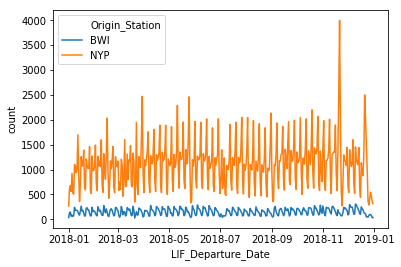

In [11]:
sns.lineplot(x=b.index, y='count', hue='Origin_Station', data=b)

# Distplot

In [12]:
trips.head()

,Amtrak_Cust_ID,LIF_Departure_Date,Route_Code,Rail_Amount,Accommodation_Amount,Origin_Station,Destination_Station,Billing_State,Billing_Zip,Home_Station,Minutes_to_Home_Station,Miles_to_Home_Station,Population_of_Billing_Zip
0,329984,2018-11-30,5,103.0,0.0,BWI,PHL,MD,21045,BWI,20.120357,14.53728,38361
1,337765,2018-01-23,5,51.0,0.0,BWI,PHL,MD,21045,BWI,20.120357,14.53728,38361
2,337765,2018-05-23,5,51.0,0.0,BWI,PHL,MD,21045,BWI,20.120357,14.53728,38361
3,337765,2018-06-21,5,83.0,0.0,BWI,PHL,MD,21045,BWI,20.120357,14.53728,38361
4,337765,2018-08-16,5,51.0,0.0,BWI,PHL,MD,21045,BWI,20.120357,14.53728,38361


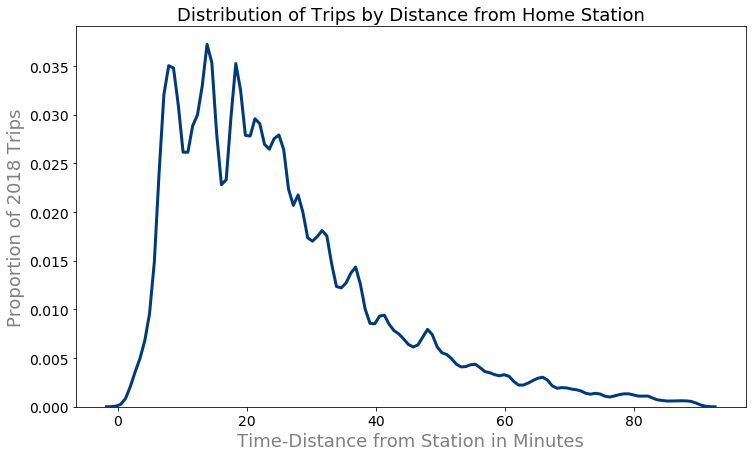

In [15]:
g = sns.distplot(trips['Minutes_to_Home_Station'], hist=False, color='#003a7b',
                kde_kws={"lw": 3});

g.figure.set_size_inches(12,7)
# g.axes.set_title('Majority of trips in NYP, WAS, PHL', fontsize=24)
# Set the xlabel of the graph from here
g.set_xlabel("Time-Distance from Station in Minutes",size = 18,alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Proportion of 2018 Trips",size = 18,alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.set_title("Distribution of Trips by Distance from Home Station", size=18)
g.tick_params(labelsize=14,labelcolor="black");